# ASTRA Toolbox Trial Run

## Installation
In the terminal, run `conda env create --name xct --clone base` to create a new conda environment called `xct` based on the `base` environment. Then, run `conda activate xct` to activate the new environment.

Run `conda install -c astra-toolbox -c nvidia astra-toolbox` to install the ASTRA toolbox.

If any other packages are missing, such as ipykernel or numpy, run `conda install <package name>` to install them.

In [7]:
import astra
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
""" 
Amy's Brain Dump Notes

3D Geometries

3D Data Objects

initializer will be the tif files merged into a single np array?

Longterm goal: 
Fully automated reconstruction of all 3000 projections of any sample

Short-term goal: 
Get a version working using test data, just to get the basics of ASTRA working

Order of business: 
1. Get a representation of the data (TIFF files) in the notebook
   - 3D np array? 
   - If size becomes an issue, try to take a subset of the data, i.e., the middle 30% of the data
2. Do math to get function parameter values
3. Continue following tutorial for the rest of the steps (e.g., sinograms, reconsruction, etc.)
4. Try running with projections

"""

" \nAmy's Brain Dump Notes\n\n3D Geometries\n\n3D Data Objects\n\ninitializer will be the tif files merged into a single np array?\n\nLongterm goal: \nFully automated reconstruction of all 3000 projections of any sample\n\nShort-term goal: \nGet a version working using test data, just to get the basics of ASTRA working\n\nOrder of business: \n1. Get a representation of the data (TIFF files) in the notebook\n   - 3D np array? \n   - If size becomes an issue, try to take a subset of the data, i.e., the middle 30% of the data\n2. Do math to get function parameter values\n3. Continue following tutorial for the rest of the steps (e.g., sinograms, reconsruction, etc.)\n4. Try running with projections\n\n"

uint16
[[35938 35976 36073 ... 36060 36068 35926]
 [36018 36328 36265 ... 36037 36035 36120]
 [36016 36311 36319 ... 36062 36075 36054]
 ...
 [35976 36168 36080 ... 36019 36081 36027]
 [36011 36155 36094 ... 36025 36009 36016]
 [36005 36211 36103 ... 36101 35967 35969]]


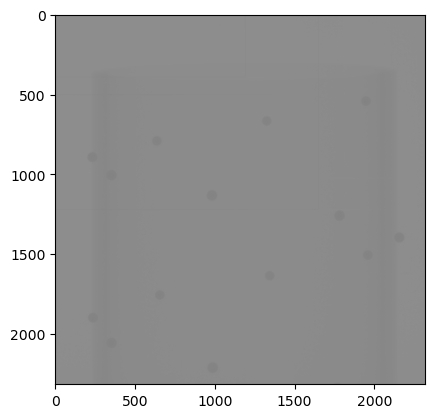

In [18]:
im = Image.open('Projections/Projection_1.tif')
imarray = np.array(im)
print(imarray.dtype)
print(imarray)
plt.imshow(im, cmap='gray', vmin=0, vmax=65535)
plt.show()


In [ ]:
"""
Create a 3D volume geometry:

vol_geom = astra.create_vol_geom([n_rows, n_cols, n_slices])
vol_geom = astra.create_vol_geom(n_rows, n_cols, n_slices)

----- OR -----

To additionally specify the extent of the 3D volume (note that rows are oriented 
along the Y axis, columns along the X axis and slices along the Z axis):

vol_geom = astra.create_vol_geom(n_rows, n_cols, n_slices, min_x, max_x, min_y, max_y, min_z, max_z)

This can be used to control the voxel size, including specifying anisotropic 
voxels (note that the FDK algorithm does not currently support anisotropic 
voxels and will raise an exception).

"""
detector_rows = 2316 # vertical num pixels
detector_cols = 2316 # horizontal num pixels
vol_geom = astra.create_vol_geom(detector_rows, detector_cols)

In [ ]:
"""
Create a 3D cone beam geometry.

proj_geom = astra.create_proj_geom('cone',  det_col_spacing, det_row_spacing, det_row_count, det_col_count, angles, source_origin, origin_det)

det_col_spacing: distance between the centers of two horizontally adjacent detector pixels
det_row_spacing: distance between the centers of two vertically adjacent detector pixels
det_row_count: number of detector rows in a single projection
det_col_count: number of detector columns in a single projection
angles: projection angles in radians
source_origin: distance between the source and the center of rotation
origin_det: distance between the center of rotation and the detector array
"""
detector_pixel_size = 0.05 # in mm
num_projections = 3001

det_col_spacing = __ 
det_row_spacing = __
angles = np.linspace(0, 2 * np.pi, num=num_projections, endpoint=False) # in radians
dist_source_to_origin = __ # in mm
dist_origin_to_detector = __ # in mm

proj_geom = astra.create_proj_geom('cone', det_col_spacing, det_row_spacing, detector_rows, detector_cols, angles, vol_geom)

FileNotFoundError: [Errno 2] No such file or directory: 'phantom.png'